In [1]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline


In [2]:
df = pd.read_csv('../data/raw_data/all.csv')
df= df[df['PY'] != 2019]

C:\Users\lin\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (2,6,56,65,66) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Notice that some documents don't have key words, first we plot the proportion of misssing key words by year

In [3]:
year = []
missing = []
for i in range(1972,2020):
    year.append(i)
    tmp = df[df['PY'] == i]
    missing.append(tmp['DE'].isna().sum()/tmp.shape[0])

C:\Users\lin\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in longlong_scalars
  


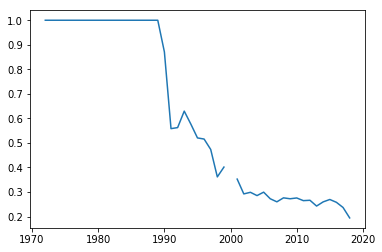

In [4]:
plt.plot(year,missing)

## Count different type by year

In [5]:
type_by_year = df.groupby(['PY'])['PT'].value_counts().unstack().fillna(0)

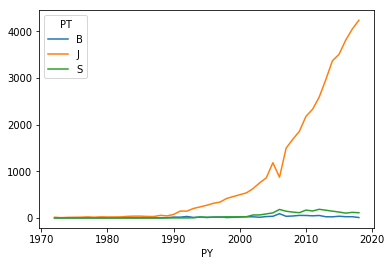

In [6]:
type_by_year.plot()

## Count different language by year

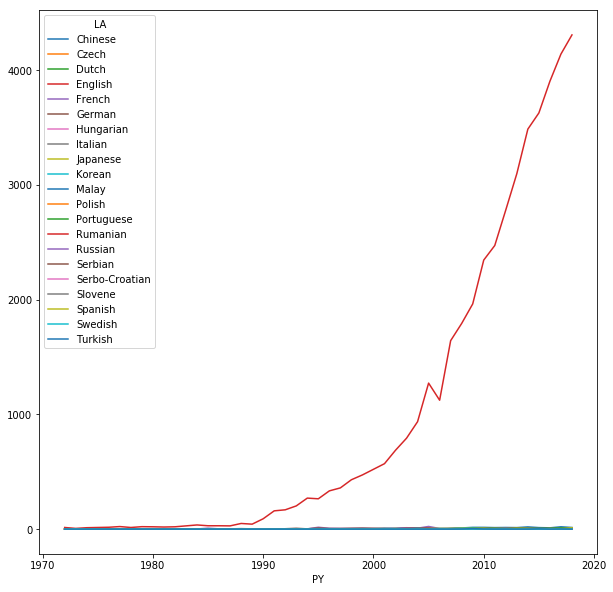

In [7]:
df.groupby(['PY'])['LA'].value_counts().unstack().fillna(0).plot(figsize = (10,10))

## Try to extract institute information from email address Only count university email

In [8]:
#fill nan with Unknown@Unknown and create mark if the email address is an edu email
df['Edu'] = df['EM'].fillna('Unknown@Unknown').apply(lambda x: 'edu' in x)
#Only select EM PY
edu = df[df['Edu'] == True][['EM','PY']]
#Extract institution name from email address
edu['Institution'] = edu['EM'].apply(lambda x: ','.join([email.split('@')[1].split('.edu')[0] for email in x.split(';')]))
edu = edu[['PY','Institution']]
#Because some records contains more than one email address, expand them to multiple rows
edu = edu.set_index('PY').stack().str.split(',', expand=True).stack().reset_index(-1,drop=True)\
.reset_index().rename(columns = {0:'Institution'})

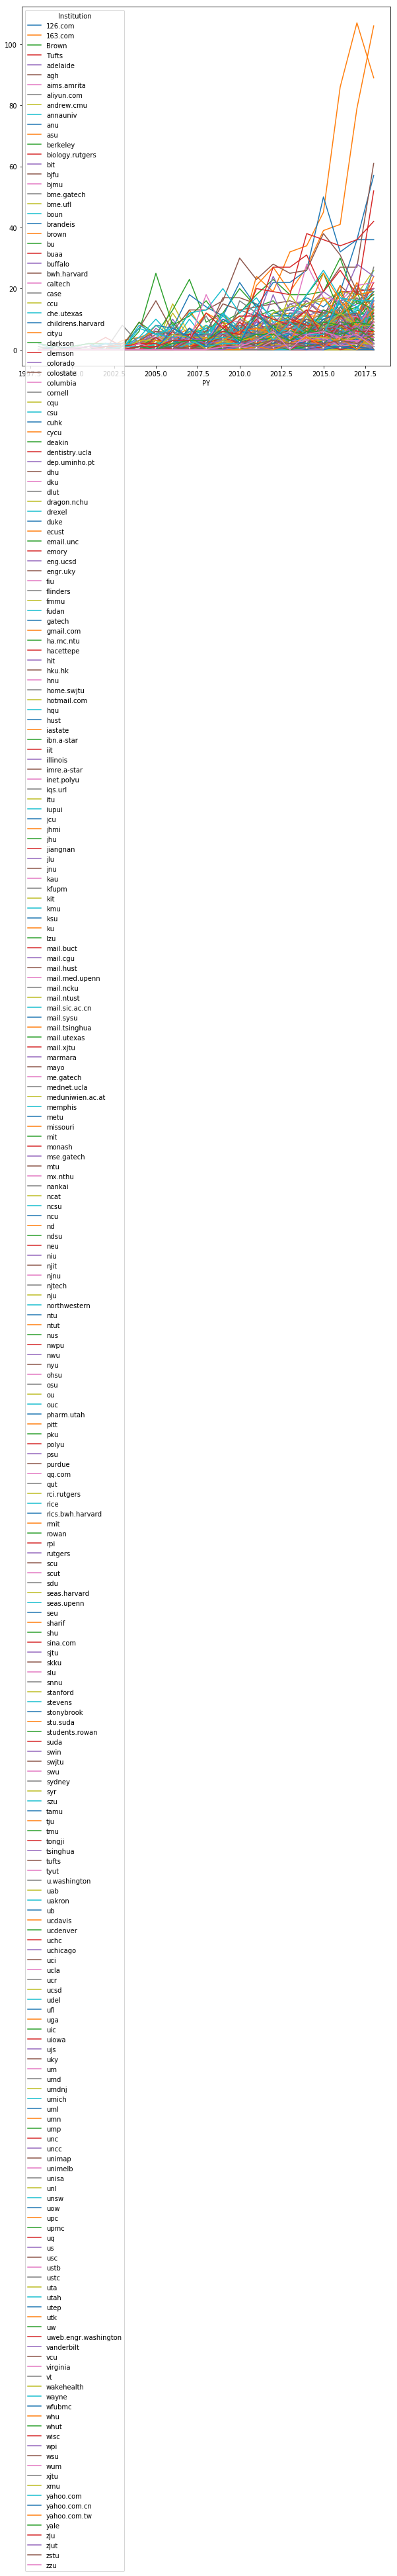

In [9]:
edu[edu['Institution'].isin(edu['Institution'].value_counts()[edu['Institution'].value_counts() > 15].index)].groupby(['PY'])['Institution'].value_counts().unstack().fillna(0).plot(figsize = (10,10))

In [ ]:
#https://www.jiqizhixin.com/articles/2017-07-30
#https://nbviewer.jupyter.org/github/yihongfa/pythondata/blob/master/document_cluster.ipynb